In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

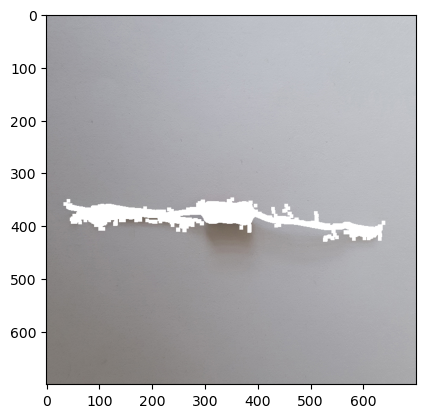

In [22]:
img = cv2.imread('res/carbon4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suavizado = cv2.GaussianBlur(gray, (5, 5), 0)
umbral = cv2.adaptiveThreshold(suavizado, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
dilated = cv2.dilate(umbral, np.ones((7, 7), np.uint8), iterations=1)
contorno, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contorno = sorted(contorno, key=cv2.contourArea, reverse=True)[:1]
cv2.drawContours(img, contorno, -1,  (255, 255, 255), cv2.FILLED)
rect = cv2.minAreaRect(contorno[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
#cv2.drawContours(img,[box],0,(0,0,255),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

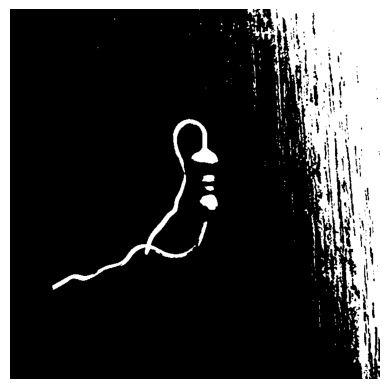

In [44]:
# Cargar la imagen en RGB
img = cv2.cvtColor(cv2.imread('res/carbon1.jpg'), cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

# Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 150  # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

# Encontrar los contornos en la imagen umbralizada
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Dibujar el contorno número 100 en la imagen umbralizada
contour_img = cv2.drawContours(thresholded, contours, 100, (0, 255, 0), 2)

# Mostrar la imagen resultante
plt.imshow(contour_img, cmap='gray')
plt.axis('off')
plt.show()



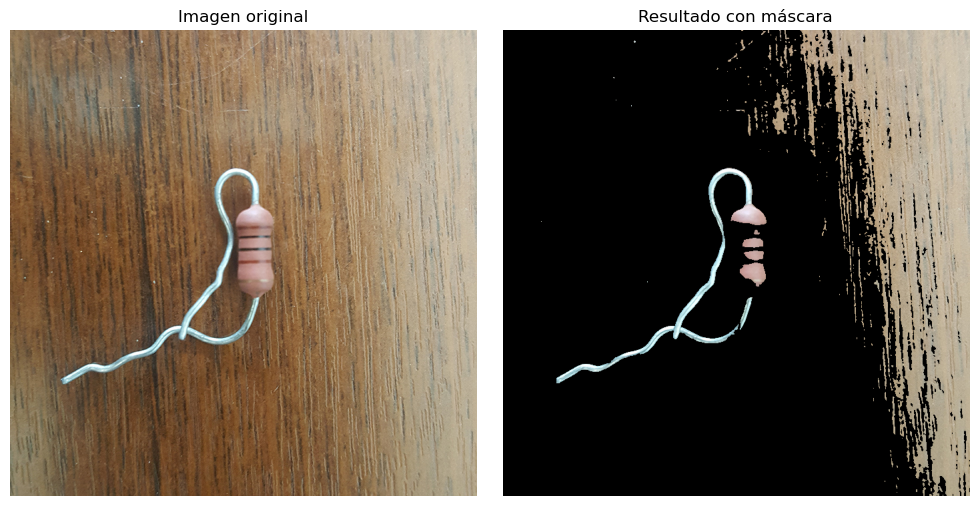

In [80]:
# Cargar la imagen en RGB
img = cv2.cvtColor(cv2.imread('res/carbon1.jpg'), cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 3), 0)

# Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 140  # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

# Encontrar los contornos en la imagen umbralizada
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Crear una máscara a partir del contorno
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Aplicar la máscara a la imagen original
masked_image = cv2.bitwise_and(img, mask)

# Mostrar la imagen original y el resultado con la máscara aplicada
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(masked_image)
axs[1].set_title('Resultado con máscara')
axs[1].axis('off')

plt.tight_layout()
plt.show()


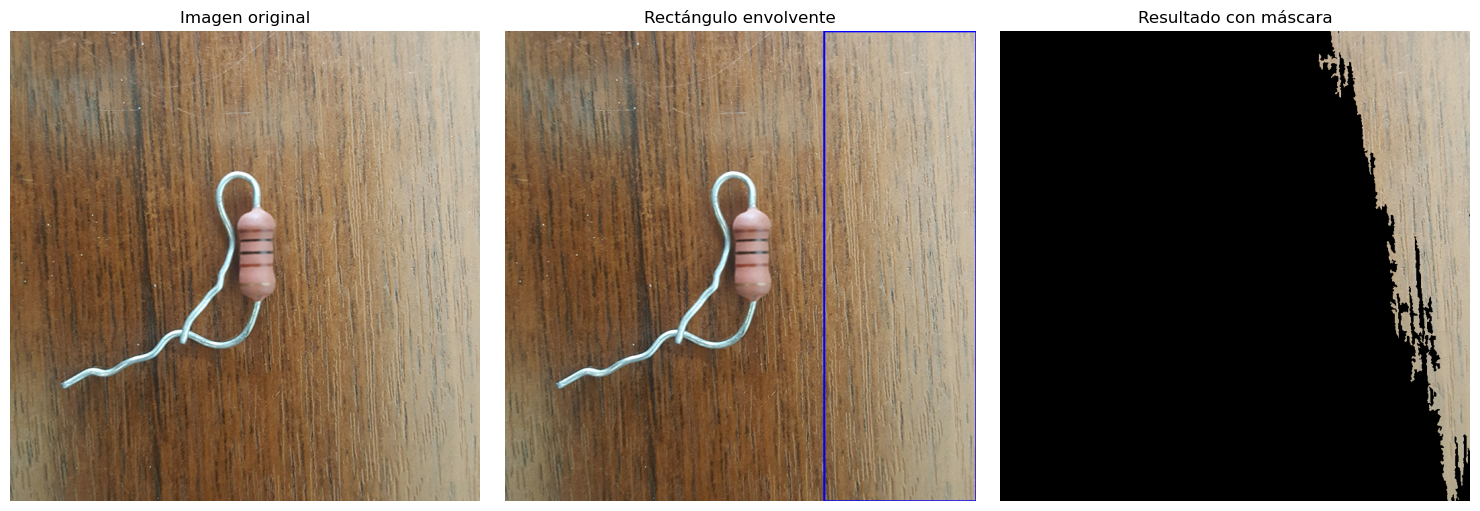

In [87]:
# Cargar la imagen en RGB
img = cv2.cvtColor(cv2.imread('res/carbon1.jpg'), cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

# Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 150  # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

# Encontrar los contornos en la imagen umbralizada
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Obtener el contorno más grande
contour = max(contours, key=cv2.contourArea)

# Calcular el centroide del contorno
M = cv2.moments(contour)
centroid_x = int(M['m10'] / M['m00'])
centroid_y = int(M['m01'] / M['m00'])
centroid = (centroid_x, centroid_y)

# Obtener el rectángulo envolvente del contorno
x, y, w, h = cv2.boundingRect(contour)
rect = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 0, 255), 2)

# Crear una máscara a partir del rectángulo envolvente
mask = np.zeros_like(img)
cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

# Aplicar la máscara a la imagen original
masked_image = cv2.bitwise_and(img, mask)

# Pintar los píxeles fuera del rectángulo con un valor de 0
masked_image[np.where(mask == 0)] = 0

# Mostrar la imagen original, el rectángulo envolvente y el resultado con la máscara aplicada
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img)
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(rect)
axs[1].set_title('Rectángulo envolvente')
axs[1].axis('off')
axs[2].imshow(masked_image)
axs[2].set_title('Resultado con máscara')
axs[2].axis('off')

plt.tight_layout()
plt.show()


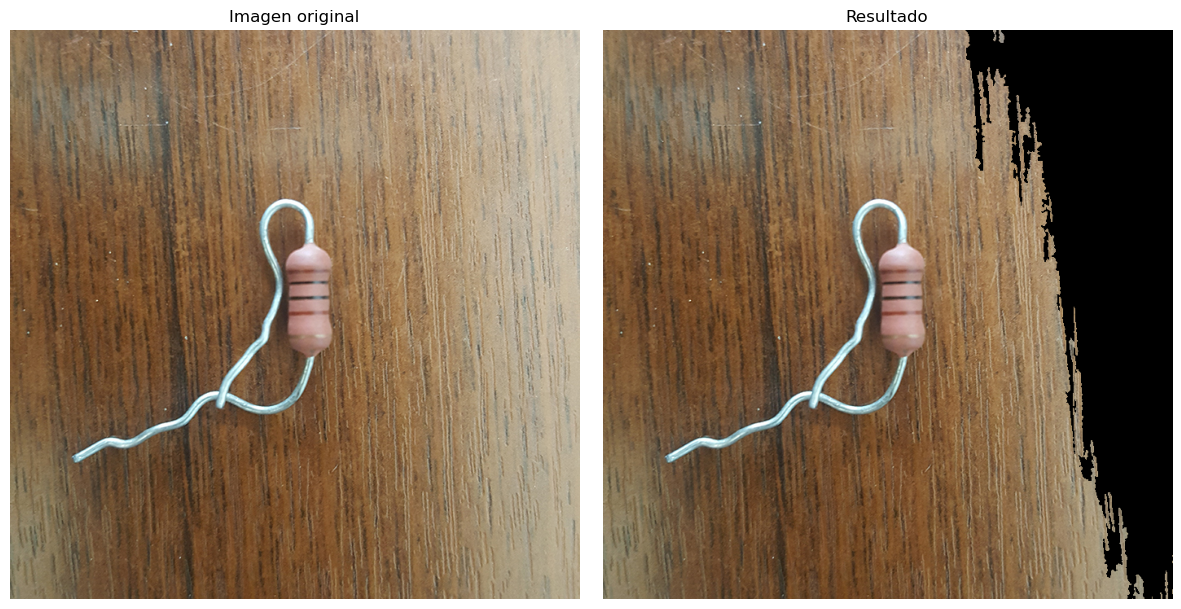

In [88]:
# Cargar la imagen en RGB
img = cv2.cvtColor(cv2.imread('res/carbon1.jpg'), cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

# Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 140  # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

# Encontrar los contornos en la imagen umbralizada
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Obtener el contorno más grande
contour = max(contours, key=cv2.contourArea)

# Calcular el centroide del contorno
M = cv2.moments(contour)
centroid_x = int(M['m10'] / M['m00'])
centroid_y = int(M['m01'] / M['m00'])
centroid = (centroid_x, centroid_y)

# Obtener el rectángulo envolvente del contorno
x, y, w, h = cv2.boundingRect(contour)
rect = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 0, 255), 2)

# Crear una máscara a partir del rectángulo envolvente
mask = np.zeros_like(img)
cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

# Invertir la máscara
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara inversa a la imagen original
masked_image = cv2.bitwise_and(img, mask_inverse)

# Mostrar la imagen original y la imagen resultante
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img)
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(masked_image)
axs[1].set_title('Resultado')
axs[1].axis('off')

plt.tight_layout()
plt.show()


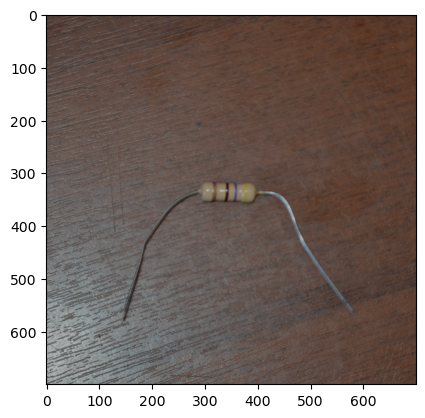

In [234]:
#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):

    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)

    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):

    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)

    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255

    res = res.astype(np.uint8)

    return res

img = cv2.cvtColor(cv2.imread('res/buena11.jpg'), cv2.COLOR_BGR2RGB)

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 0.7
gamma = 1

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

plt.imshow(res_oscuro, cmap='gray')

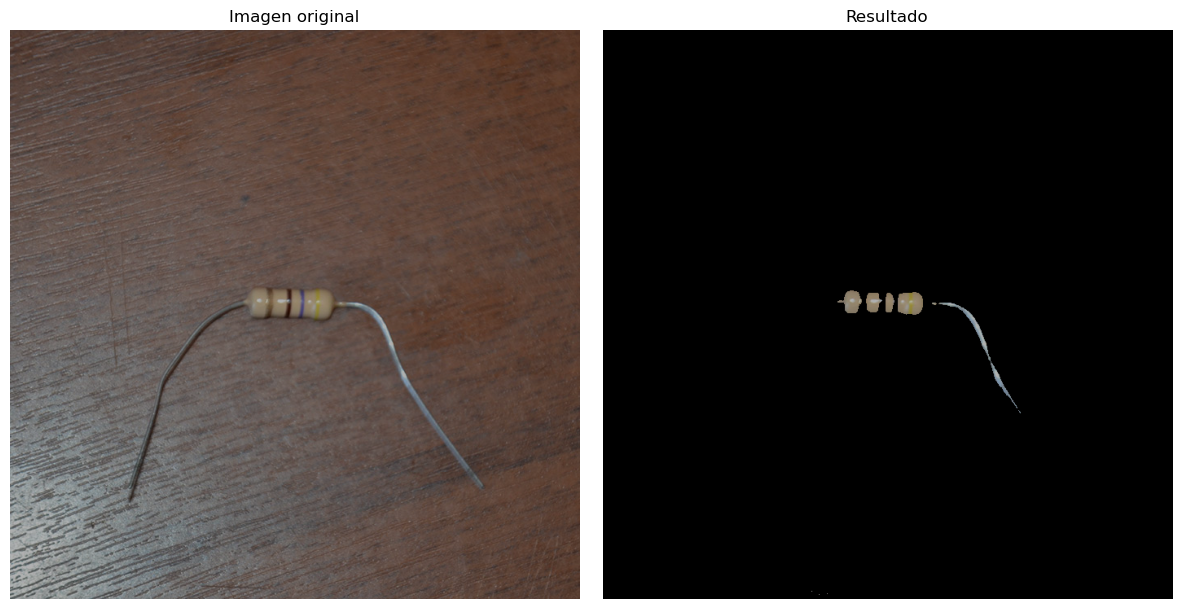

In [235]:
# Cargar la imagen en RGB
# img = cv2.cvtColor(cv2.imread('res/carbon2.jpg'), cv2.COLOR_BGR2RGB)

img = res_oscuro
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

# Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 118  # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

# Encontrar los contornos en la imagen umbralizada
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Obtener el contorno más grande
contour = max(contours, key=cv2.contourArea)

# Calcular el centroide del contorno
M = cv2.moments(contour)
centroid_x = int(M['m10'] / M['m00'])
centroid_y = int(M['m01'] / M['m00'])
centroid = (centroid_x, centroid_y)

# Obtener el rectángulo envolvente del contorno
x, y, w, h = cv2.boundingRect(contour)
rect = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 0, 255), 2)

# Crear una máscara a partir del rectángulo envolvente
mask = np.zeros_like(img)
cv2.drawContours(mask, [contour], -1, (255, 255, 255), thickness=cv2.FILLED)

# Invertir la máscara
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara inversa a la imagen original
masked_image = cv2.bitwise_and(img, mask_inverse)

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(masked_image, cv2.COLOR_RGB2GRAY)

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 3), 0)

# # Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 170 # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

# Encontrar los contornos en la imagen umbralizada
contours, hierarchy = cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Crear una máscara a partir del contorno
mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Aplicar la máscara a la imagen original
masked_image = cv2.bitwise_and(img, mask)

# Mostrar la imagen original y la imagen resultante
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img)
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(masked_image, cmap='gray')
axs[1].set_title('Resultado')
axs[1].axis('off')

plt.tight_layout()
plt.show()


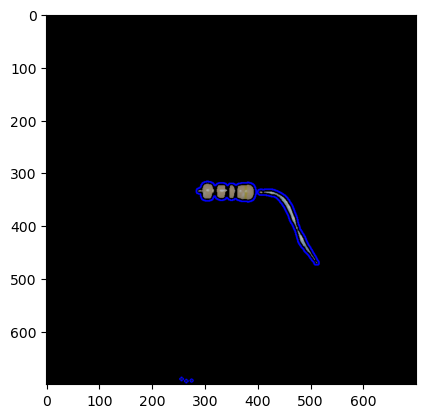

In [236]:
gray = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)
suavizado = cv2.GaussianBlur(gray, (5, 5), 0)
umbral = cv2.adaptiveThreshold(suavizado, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
contorno, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(masked_image, contorno, -1, (0, 0, 255), 2)
plt.imshow(masked_image)
plt.show()

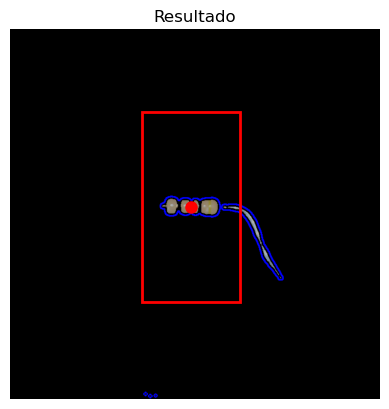

Centroide: (343, 335)
Rectángulo envolvente: (x=436, y=515, w=-186, h=-360)


In [240]:
# Calcular el área de cada contorno y encontrar el contorno de mayor área
area_contornos = [cv2.contourArea(contorno) for contorno in contorno]
indice_mayor_area = np.argmax(area_contornos)
mayor_contorno = contorno[indice_mayor_area]

# Calcular el centroide del contorno de mayor área
M = cv2.moments(mayor_contorno)
centroid_x = int(M['m10'] / M['m00'])
centroid_y = int(M['m01'] / M['m00'])
centroid = (centroid_x, centroid_y)

# Obtener el rectángulo envolvente del contorno de mayor área
x, y, w, h = cv2.boundingRect(mayor_contorno)

# Definir las nuevas dimensiones del rectángulo
padding_x = 150
padding_y = 200
new_w = w - 2 * padding_x
new_h = h - 2 * padding_y

# Calcular las coordenadas del rectángulo centrado según el centroide
new_x = centroid_x - new_w // 2
new_y = centroid_y - new_h // 2

rect = patches.Rectangle((new_x, new_y), new_w, new_h, linewidth=2, edgecolor='r', facecolor='none')

# Mostrar el resultado con el centroide y el rectángulo envolvente
plt.imshow(masked_image, cmap='gray')
plt.plot(centroid_x, centroid_y, 'ro', markersize=8)
plt.gca().add_patch(rect)
plt.title('Resultado')
plt.axis('off')

plt.show()

# Mostrar los resultados numéricos
print('Centroide:', centroid)
print('Rectángulo envolvente: (x={}, y={}, w={}, h={})'.format(new_x, new_y, new_w, new_h))


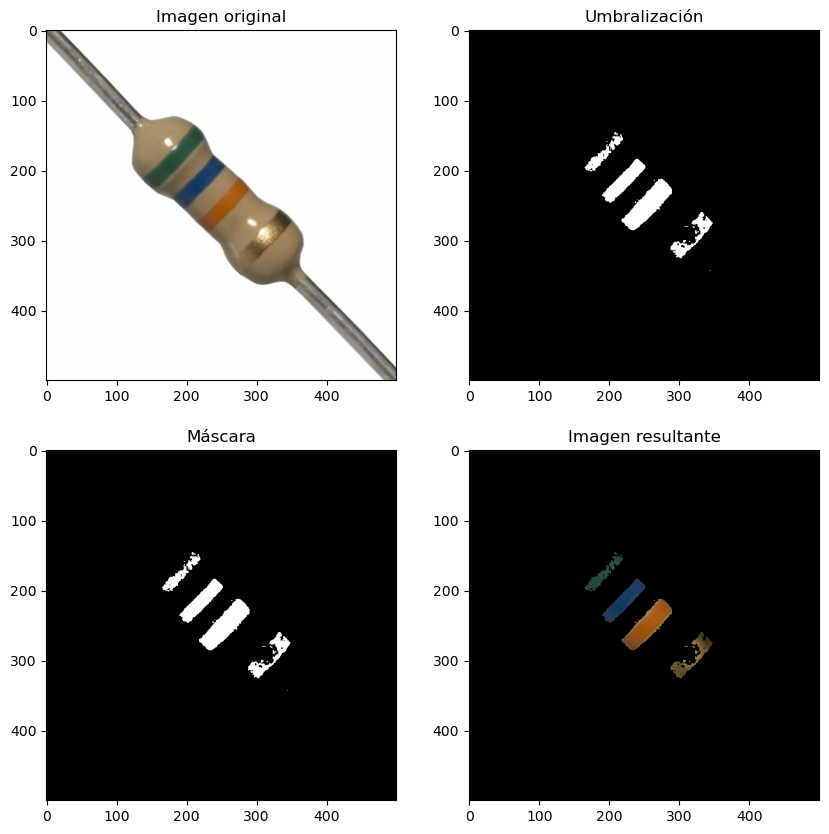

In [11]:
img = cv2.imread('res\\resistencia24.jpg', cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Umbralizar el canal S
s = img_hsv[:, :, 1]
umbral = 118
umbralizacion = np.zeros_like(s)
umbralizacion[s >= umbral] = 255
# Binarizar la umbralización para crear una máscara
ret, mascara = cv2.threshold(umbralizacion, 0, 255, cv2.THRESH_BINARY)
# Aplicar la máscara a la imagen original
img_mascarada = cv2.bitwise_and(img, img, mask=mascara)

# Mostrar la imagen original, la umbralización, la máscara y la imagen resultante
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Imagen original')
axs[0, 1].imshow(umbralizacion, cmap='gray')
axs[0, 1].set_title('Umbralización')
axs[1, 0].imshow(mascara, cmap='gray')
axs[1, 0].set_title('Máscara')
axs[1, 1].imshow(cv2.cvtColor(img_mascarada, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Imagen resultante')
plt.show()

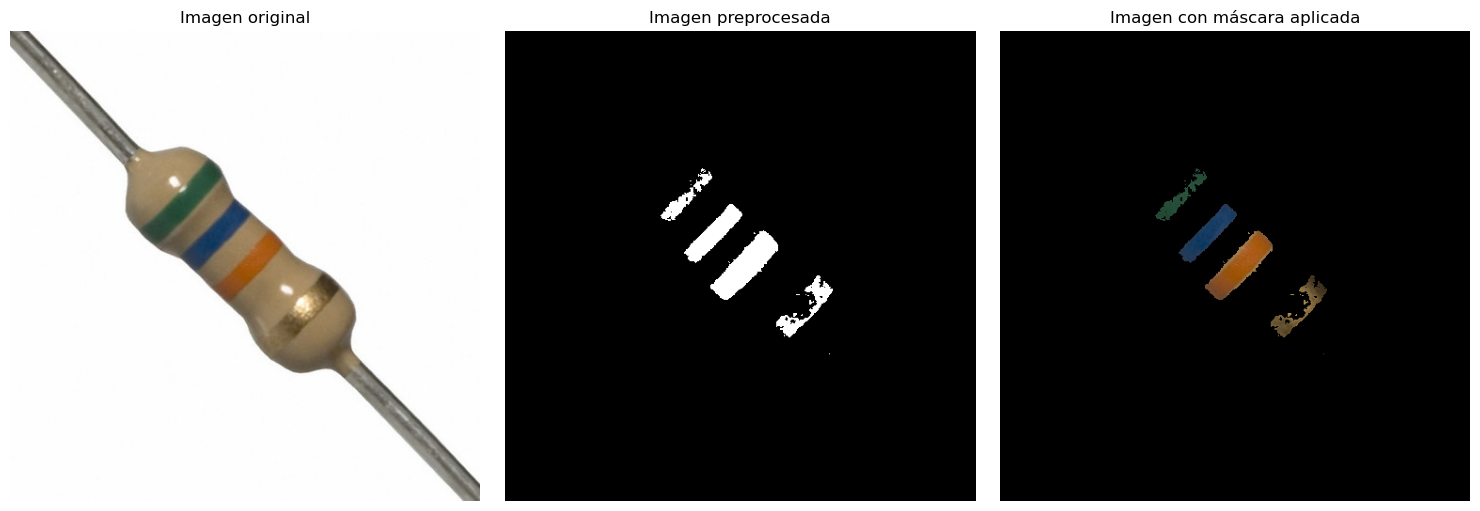

In [29]:
def preprocess_image(image):
    # Convertir la imagen a espacio de color HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extraer el canal de saturación (S)
    s = image_hsv[:, :, 1]

    # Aplicar umbralización para separar las bandas de la película
    threshold = 118
    _, thresholded = cv2.threshold(s, threshold, 255, cv2.THRESH_BINARY)

    # Realizar dilatación para unir las bandas
    kernel_size = 1
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    dilated = cv2.dilate(thresholded, kernel, iterations=1)

    # Aplicar transformación de top-hat para eliminar los brillos
    kernel_size = 100
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    top_hat = cv2.morphologyEx(dilated, cv2.MORPH_TOPHAT, kernel)

    return top_hat

# Cargar la imagen desde un archivo
image_path = 'res\\resistencia24.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocesar la imagen
preprocessed_image = preprocess_image(image)

# Crear una máscara a partir de la imagen preprocesada
_, mask = cv2.threshold(preprocessed_image, 1, 255, cv2.THRESH_BINARY)

# Aplicar la máscara a la imagen original
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Mostrar la imagen original, la imagen preprocesada y la imagen resultante
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(preprocessed_image, cmap='gray')
axs[1].set_title('Imagen preprocesada')
axs[1].axis('off')
axs[2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Imagen con máscara aplicada')
axs[2].axis('off')

plt.tight_layout()
plt.show()


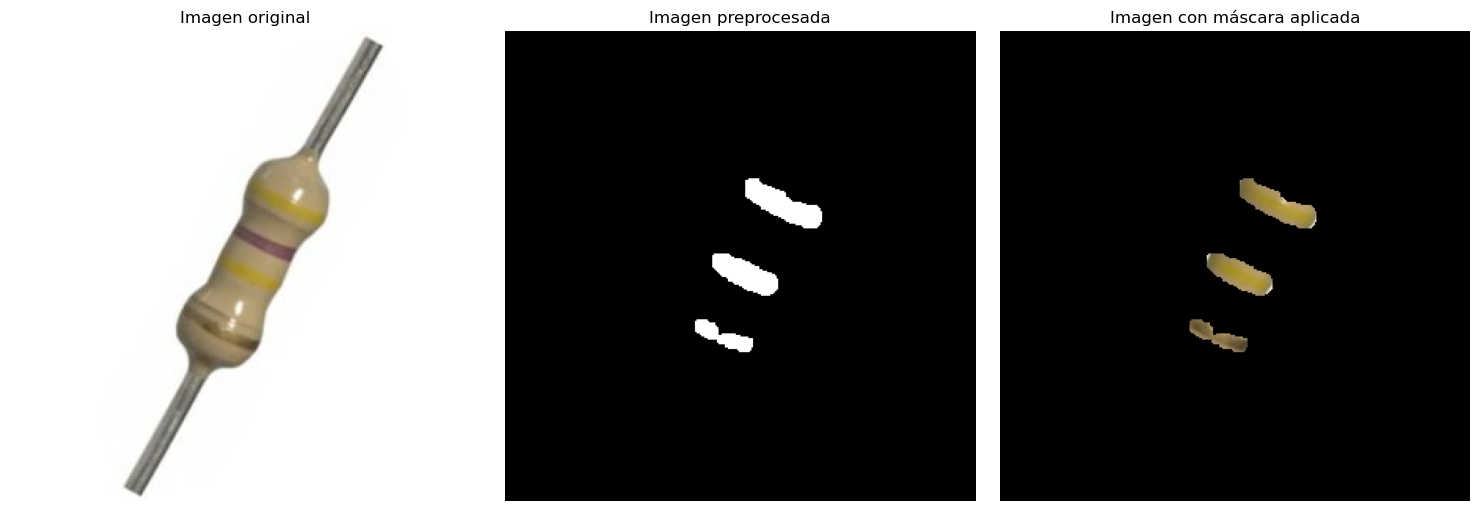

In [6]:
def preprocess_image(image):
    # Convertir la imagen a espacio de color HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Extraer el canal de saturación (S)
    s = image_hsv[:, :, 1]

    # Realizar dilatación para unir las bandas
    kernel_size = 5
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    dilated = cv2.dilate(s, kernel, iterations=1)

    # Aplicar transformación de top-hat para eliminar los brillos
    kernel_size = 200
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    top_hat = cv2.morphologyEx(dilated, cv2.MORPH_TOPHAT, kernel)

    # Aplicar umbralización para separar las bandas de la película
    threshold = 118
    _, thresholded = cv2.threshold(top_hat, threshold, 255, cv2.THRESH_BINARY)

    return thresholded

# Cargar la imagen desde un archivo
image_path = 'res\\resistencia23.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Preprocesar la imagen
preprocessed_image = preprocess_image(image)

# Crear una máscara a partir de la imagen preprocesada
_, mask = cv2.threshold(preprocessed_image, 1, 255, cv2.THRESH_BINARY)

# Aplicar la máscara a la imagen original
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Mostrar la imagen original, la imagen preprocesada y la imagen con máscara
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Imagen original')
axs[0].axis('off')
axs[1].imshow(preprocessed_image, cmap='gray')
axs[1].set_title('Imagen preprocesada')
axs[1].axis('off')
axs[2].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Imagen con máscara aplicada')
axs[2].axis('off')

plt.tight_layout()
plt.show()
